In [155]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# LABELS = ['square', 'circle', 'cyan', 'red', 'yellow', 'green']
LABELS = ['square', 'circle', 'triangle', 'pentagon', 'cyan', 'red', 'yellow', 'green']
SHAPES = ['square', 'circle', 'triangle', 'pentagon']
COLORS = [(0, 192, 192),
          (255, 0, 0),
          (255, 255, 0),
          (0, 255, 0)
          ]

def draw_shape(color_id, shape_id, draw, img_size, start_pos):
    if shape_id == 0:
        draw.rectangle((start_pos, start_pos,
                        img_size[0]-(start_pos+1), img_size[1]-(start_pos+1)),
                       fill=COLORS[color_id])
    elif shape_id == 1:
        draw.ellipse((start_pos, start_pos,
                      img_size[0]-(start_pos+1), img_size[1]-(start_pos+1)),
                     fill=COLORS[color_id])
    elif shape_id == 2:
        draw.polygon([(start_pos, img_size[0]-(start_pos+1)),
                      (int(img_size[1]/2), start_pos),
                      (img_size[0]-(start_pos+1), img_size[1]-(start_pos+1))],
                     fill=COLORS[color_id])
    elif shape_id == 3:
        draw.polygon([(int(1/3*img_size[0]), img_size[1]-(start_pos+1)),
                      (start_pos, int(4/9*img_size[1])),
                      (int(img_size[0]/2), start_pos),
                      (img_size[0]-(start_pos+1), int(4/9*img_size[1])),
                      (int(2/3*img_size[0]), img_size[1]-(start_pos+1))],
                     fill=COLORS[color_id])


def gen_dataset(num_samples, img_size=(28, 28), start_pos=8, same_color_dif_shape=False):
    
    num_shapes = len(SHAPES)
    num_colors = len(COLORS)

    dataset = []
    labels = []
    for i in range(num_samples):

        # choose random color 
        color_id = np.random.randint(0, num_colors)
        # randomly select a shape (either square or circle)
        shape_id = np.random.randint(0, num_shapes)
        # create object
        im1 = Image.new('RGB', img_size, (128, 128, 128))
        draw = ImageDraw.Draw(im1)
        draw_shape(color_id, shape_id, draw, img_size, start_pos)

        label1 = np.zeros(num_shapes + num_colors)
        label1[0:num_shapes][shape_id] = 1.
        label1[num_shapes:][color_id] = 1.

        if same_color_dif_shape:
            # set to that of first object
            color_id2 = color_id
            # randomly select shape id that is different from first object
            remaining_shape_ids = list(np.arange(0, num_shapes))
            remaining_shape_ids.remove(shape_id)
            shape_id2 = np.random.choice(remaining_shape_ids)
        else:
            # sample attributes for second object
            one_attr_same = False
            while not one_attr_same:
                # randomly draw a color
                color_id2 = np.random.randint(0, num_colors)
                # randomly select a shape (either square or circle)
                shape_id2 = np.random.randint(0, num_shapes)
                if (color_id2 != color_id and shape_id2 == shape_id) or \
                        (color_id2 == color_id and shape_id2 !=shape_id):
                    one_attr_same = True

        # create object
        im2 = Image.new('RGB', img_size, (128, 128, 128))
        draw = ImageDraw.Draw(im2)
        draw_shape(color_id2, shape_id2, draw, img_size, start_pos)

        label2 = np.zeros(num_shapes + num_colors)
        label2[0:num_shapes][shape_id2] = 1.
        label2[num_shapes:][color_id2] = 1.

        # pair both images and labels of these
        labels.append([label1, label2])
        imgs_np = [np.array(im1), np.array(im2)]
        dataset.append(imgs_np)
    
    return np.array(dataset), np.array(labels)

### Same color different shape

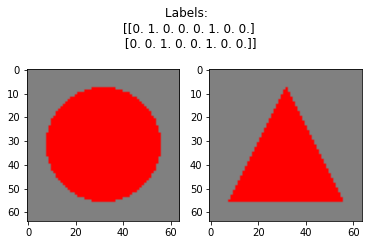

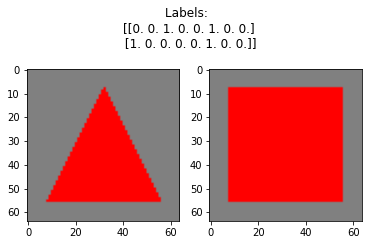

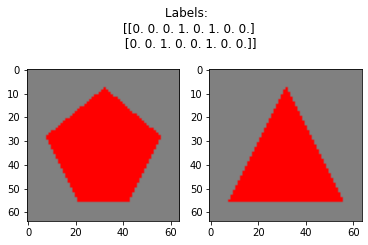

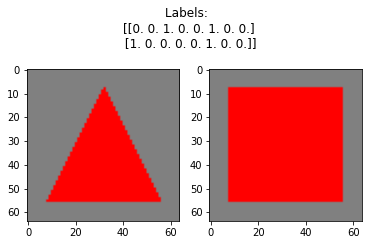

In [156]:
num_train_samples = 10000
num_val_samples = 1000

train_data, train_labels = gen_dataset(num_train_samples, img_size=(64, 64), start_pos=8, same_color_dif_shape=True)
val_data, val_labels = gen_dataset(num_val_samples, img_size=(64, 64), start_pos=8, same_color_dif_shape=True)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(train_data[0, 0])
axs[1].imshow(train_data[0, 1])
plt.suptitle(f"Labels: \n{train_labels[0]}")
plt.show()

fig, axs = plt.subplots(1, 2)
axs[0].imshow(train_data[2, 0])
axs[1].imshow(train_data[2, 1])
plt.suptitle(f"Labels: \n{train_labels[2]}")
plt.show()

fig, axs = plt.subplots(1, 2)
axs[0].imshow(train_data[10, 0])
axs[1].imshow(train_data[10, 1])
plt.suptitle(f"Labels: \n{train_labels[10]}")
plt.show()

fig, axs = plt.subplots(1, 2)
axs[0].imshow(train_data[8, 0])
axs[1].imshow(train_data[8, 1])
plt.suptitle(f"Labels: \n{train_labels[8]}")
plt.show()

np.save("../Data/train_toydata_samecolor_difshape_pairs.npy", train_data)
# np.save("data/val_toydata_color_shape_pairs.npy", val_data)
np.save("../Data/train_toydata_samecolor_difshape_labels_pairs.npy", train_labels)
# np.save("data/val_toydata_labels_pairs.npy", val_labels)

### One attribute the same

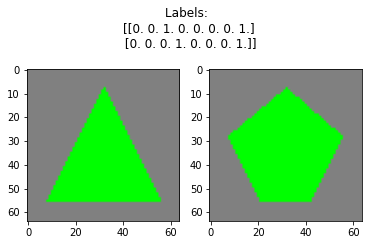

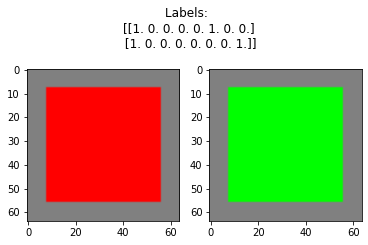

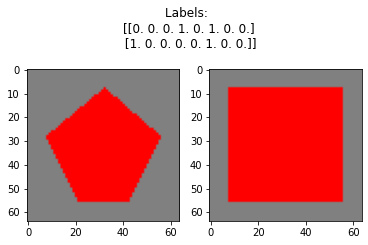

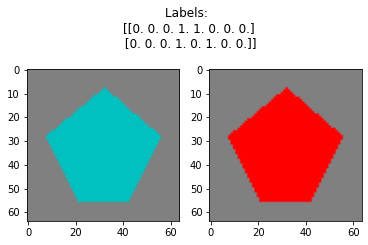

In [158]:
num_train_samples = 10000
num_val_samples = 1000

train_data, train_labels = gen_dataset(num_train_samples, img_size=(64, 64), start_pos=8, same_color_dif_shape=False)
val_data, val_labels = gen_dataset(num_val_samples, img_size=(64, 64), start_pos=8, same_color_dif_shape=False)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(train_data[0, 0])
axs[1].imshow(train_data[0, 1])
plt.suptitle(f"Labels: \n{train_labels[0]}")
plt.show()

fig, axs = plt.subplots(1, 2)
axs[0].imshow(train_data[2, 0])
axs[1].imshow(train_data[2, 1])
plt.suptitle(f"Labels: \n{train_labels[2]}")
plt.show()

fig, axs = plt.subplots(1, 2)
axs[0].imshow(train_data[10, 0])
axs[1].imshow(train_data[10, 1])
plt.suptitle(f"Labels: \n{train_labels[10]}")
plt.show()

fig, axs = plt.subplots(1, 2)
axs[0].imshow(train_data[8, 0])
axs[1].imshow(train_data[8, 1])
plt.suptitle(f"Labels: \n{train_labels[8]}")
plt.show()

np.save("../Data/train_toydata_color_shape_pairs.npy", train_data)
# np.save("data/val_toydata_color_shape_pairs.npy", val_data)
np.save("../Data/train_toydata_color_shape_labels_pairs.npy", train_labels)
# np.save("data/val_toydata_labels_pairs.npy", val_labels)
